# Sistemas de Múltiplos Classificadores

Multiple Classifier System (MCS)

***

In [1]:
# importando as bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt

# Funções de avaliação dos modelos
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV


# visualização da árvore
from sklearn.tree import plot_tree

## Conjunto de dados

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Francimaria/especializacao_DNN/main/datasets/Iris.csv')

In [3]:
X = dataset.drop([dataset.columns[-1]], axis = 1)
y = dataset[dataset.columns[-1]]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

## Bagging (Bootstrap aggregation)


Vamos avaliar o $RandomForest$

$RandomForest$ é um meta estimador que ajusta vários classificadores de árvore de decisão em várias subamostras do conjunto de dados e usa a **média** para melhorar a precisão preditiva e controlar o ajuste excessivo.

 O tamanho da subamostra é controlado com o parâmetro $max\_samples$ se $bootstrap=True$ (padrão), caso contrário, todo o conjunto de dados é usado para construir cada árvore.

Alguns parâmetros que vamos ajustar: 

'n_estimators': define o número de árvores. Por padrão 100.

'criterion': função de medida da qualidade do split.  Valores possíveis: {“gini”, “entropy”, “log_loss”}

'max_depth': A profundidade máxima da árvore

Os demais parâmetros estão descritos no seguinte [link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
model = RandomForestClassifier(random_state=20)

#treinando o modelo
model.fit(X_train, y_train)

#Resultados do classificador
print(model)

#Resultados do classificador
print(classification_report(y_test, model.predict(X_test)))

RandomForestClassifier(random_state=20)
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.87        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



**Vamos visualizar as 3 primeiras árvores**

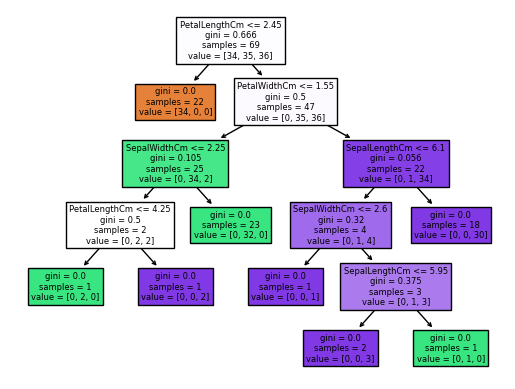

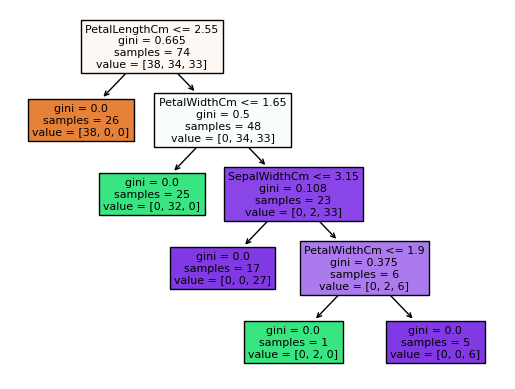

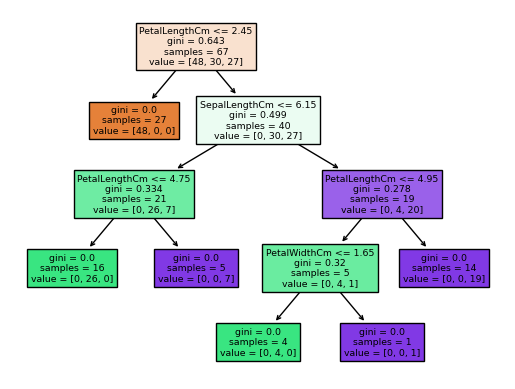

In [7]:
for i in range(3):
    tree = model.estimators_[i]
    # Retorna uma lista contendo os dados para as caixas de anotação que compõem a árvore
    tree = plot_tree(tree, feature_names=X_train.columns, filled=True)
    plt.show()


### Ajuste de parâmetros 

In [8]:
model = RandomForestClassifier(random_state=20)


parameters = {'n_estimators': [50, 100, 150],
              'criterion': ['gini', 'entropy']}

grid = GridSearchCV(estimator = model,             
                    param_grid = parameters,     
                    scoring = 'f1_macro',          # métrica de avaliação
                    cv = 5)                        # cross-validation

grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

print("Melhor parametro:", grid.best_params_) 

Melhor parametro: {'criterion': 'gini', 'n_estimators': 50}


In [9]:
#Modelo final com os melhores parâmetros selecionados 
# model = RandomForestClassifier(n_estimators=, criterion=, random_state=20)

print(model)

#treinando o modelo
model.fit(X_train, y_train)

#Resultados do classificador
print(classification_report(y_test, model.predict(X_test)))

RandomForestClassifier(random_state=20)
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.87        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



## Boosting 

Vamos avaliar o seguinte modelo:

1 - AdaBoost (Adaptive Boosting): é um meta-estimador que começa ajustando um classificador no conjunto de dados original e, em seguida, ajusta cópias adicionais do classificador no mesmo conjunto de dados, mas onde os pesos das instâncias classificadas incorretamente são ajustados de forma que os classificadores subsequentes se concentrem mais em casos difíceis.

### Adaboost

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
model = AdaBoostClassifier(estimator=None, random_state=20)

#treinando o modelo
model.fit(X_train, y_train)

#Salvando as predições
y_pred = model.predict(X_test)

print("Parâmetros\n")
print(model.get_params())
# Deprecated since version 1.2: base_estimator is deprecated and will be removed in 1.4. Use estimator instead.

print("\nEstimator\n")
print(model.estimator_)

Parâmetros

{'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': 20}

Estimator

DecisionTreeClassifier(max_depth=1)


**Vamos comparar o desempenho dele com uma árvore de decisão**

In [24]:
model_dt = DecisionTreeClassifier(max_depth=1, random_state=20)

#treinando o modelo
model_dt = model_dt.fit(X_train, y_train)

#Salvando as predições
y_pred_dt = model_dt.predict(X_test)

Matriz de Confusão sem Adaboost:
Matriz de Confusão com Adaboost:
Acurácia sem Adaboost: 66.67
Acurácia com Adaboost: 93.33


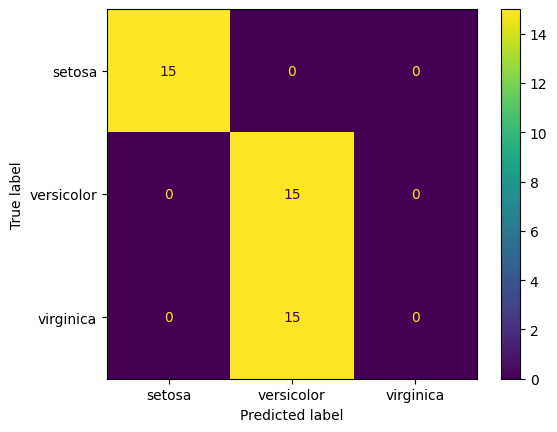

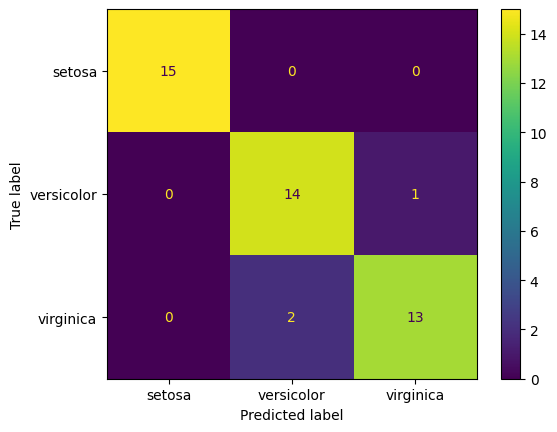

In [25]:
print("Matriz de Confusão sem Adaboost:")
disp_cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_dt, labels=model_dt.classes_),
                                 display_labels=model.classes_)
disp_cm.plot()
# print(confusion_matrix(y_test, y_pred_dt))

print("Matriz de Confusão com Adaboost:")
disp_cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, labels=model.classes_),
                                 display_labels=model.classes_)
disp_cm.plot()

print("Acurácia sem Adaboost: %.2f" % (accuracy_score(y_test, y_pred_dt)*100))
print("Acurácia com Adaboost: %.2f" % (accuracy_score(y_test, y_pred)*100))



**Como é possível observar, a adição do Adaboost ao classificador melhora muito sua eficiência.**

**Além disso, abaixo é mostrada a utilização do Adaboost, porém com outro tipo de classificador.**

In [26]:
# Classes do modelo
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [15]:
base_estimator = SVC(kernel='linear', probability=True, random_state=20)
# base_estimator = LogisticRegression(random_state=20)

model = AdaBoostClassifier(base_estimator, random_state=20)

model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = model.predict(X_test)

print("Acurácia do Adaboost usando outro estimator: %.2f" % (accuracy_score(y_test, y_pred_svm)*100))

Acurácia do Adaboost usando outro estimator: 95.56
